In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn import datasets
    from sklearn import svm
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn import linear_model


In [13]:
data = pd.read_csv(r'Housing.csv')
data.drop(columns=['Unnamed: 0'], inplace = True)

In [14]:
data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [15]:
data.duplicated().sum()

1

In [16]:
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [17]:
data.drop_duplicates(inplace = True)


In [19]:
MLdata = data[['lotsize','price']]
MLdata

,lotsize,price
0,5850,42000.0
1,4000,38500.0
2,3060,49500.0
3,6650,60500.0
4,6360,61000.0
...,...,...
541,4800,91500.0
542,6000,94000.0
543,6000,103000.0
544,6000,105000.0


In [27]:
X = MLdata.drop(columns=['price'])
Y = MLdata[['price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 1)

Text(0, 0.5, 'Prise')

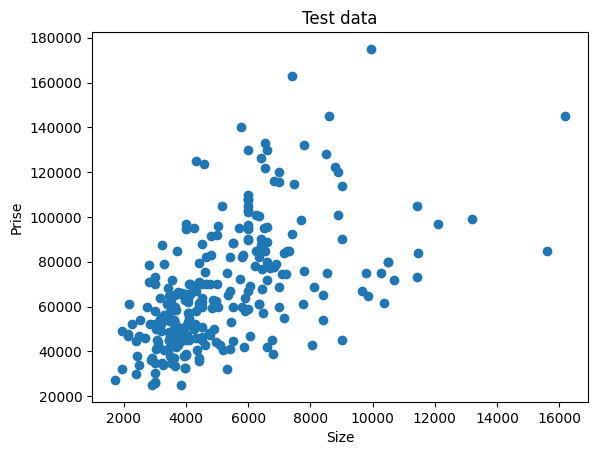

In [29]:
plt.scatter(x_test, y_test)
plt.title('Test data')
plt.xlabel('Size')
plt.ylabel('Prise')

In [37]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [39]:
regp = reg.predict(x_test)

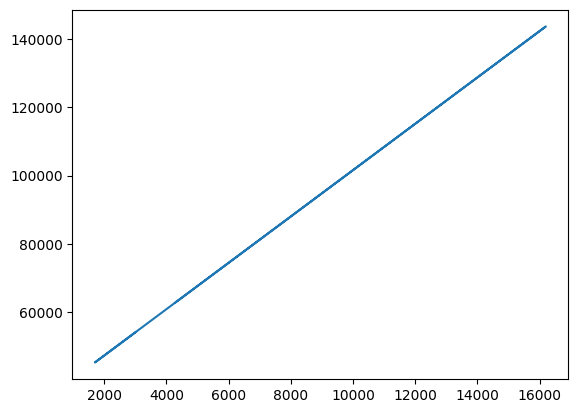

In [42]:
plt.plot(x_test,regp)

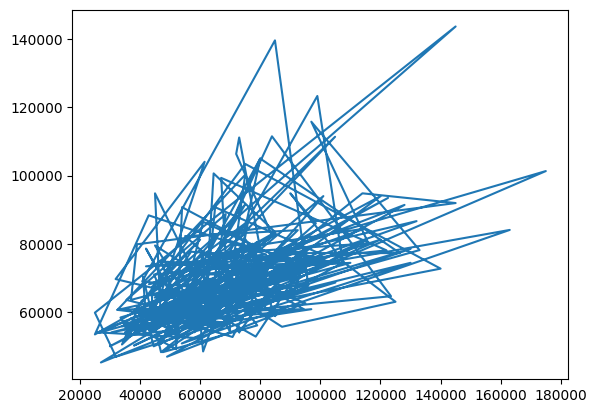

In [44]:
plt.plot(y_test,regp)

In [47]:
MLdata2 = data.copy()

In [62]:
# # MLdata2[MLdata[['']]]
# # MLdata2[(MLdata2['driveway']) & (MLdata2['airco']=='yes') ]

# filtered_data = MLdata2[(MLdata2['driveway'] == 'yes') & (MLdata2['airco'] == 'yes')]
# filtered_data

MLdata2 = MLdata2.replace({'yes': 1, 'no': 0}, inplace=False)

In [63]:
MLdata2

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


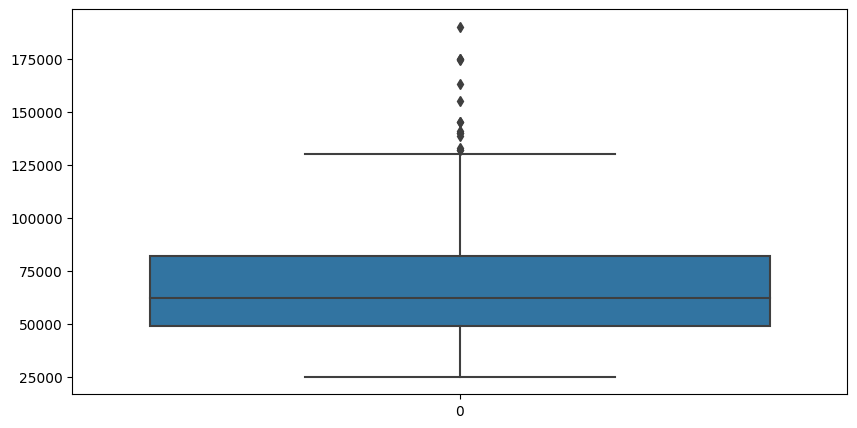

In [69]:
plt.figure(figsize = (10,5))
sns.boxplot(MLdata2['price'])
plt.show()

<AxesSubplot: >

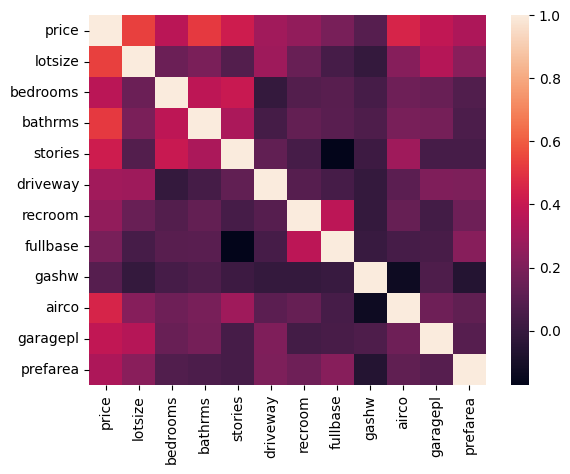

In [72]:
Hcorr = MLdata2.corr()
sns.heatmap(Hcorr)

In [70]:
X = MLdata2.drop(columns=['price'])
Y = MLdata2[['price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 1)

In [73]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
regp = reg.predict(x_test)

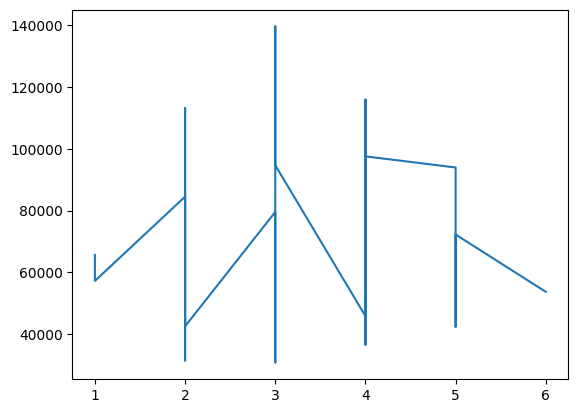

In [94]:
# plt.plot(x_test['bedrooms'],regp).sort()
br = x_test.sort_values(by = 'bedrooms')
plt.plot(br['bedrooms'],regp)

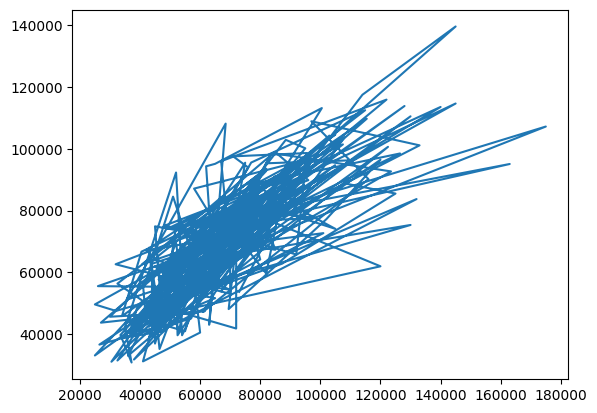

In [84]:
plt.plot(y_test,regp)